<a href="https://colab.research.google.com/github/SANJEEVKUMARBG/Capstone-Project/blob/main/Capstone_bankruptcy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Problem statement

Problem statement: To predict the likelihood of a company going bankrupt based on their financial data, including income statement and balance sheet information, as well as macroeconomic indicators. The model will be trained on historical data of companies that have gone bankrupt and will be evaluated using appropriate metrics such as accuracy and f1 score. The goal of this project is to provide valuable insights to stakeholders such as investors, creditors and management to identify the risk of bankruptcy and take appropriate action in a timely manner.

# 2.Importing basic required libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 3.Reading the dataset

In [3]:
data = pd.read_csv('/content/Company Bankruptcy Prediction.csv')

In [4]:
data.shape

(6819, 96)

In [5]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
data.max()

Bankrupt?                                                   1.0
 ROA(C) before interest and depreciation before interest    1.0
 ROA(A) before interest and % after tax                     1.0
 ROA(B) before interest and depreciation after tax          1.0
 Operating Gross Margin                                     1.0
                                                           ... 
 Liability to Equity                                        1.0
 Degree of Financial Leverage (DFL)                         1.0
 Interest Coverage Ratio (Interest expense to EBIT)         1.0
 Net Income Flag                                            1.0
 Equity to Liability                                        1.0
Length: 96, dtype: float64

In [8]:
data.min()

Bankrupt?                                                   0.0
 ROA(C) before interest and depreciation before interest    0.0
 ROA(A) before interest and % after tax                     0.0
 ROA(B) before interest and depreciation after tax          0.0
 Operating Gross Margin                                     0.0
                                                           ... 
 Liability to Equity                                        0.0
 Degree of Financial Leverage (DFL)                         0.0
 Interest Coverage Ratio (Interest expense to EBIT)         0.0
 Net Income Flag                                            1.0
 Equity to Liability                                        0.0
Length: 96, dtype: float64

In [9]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


## Inferences


1.   Dataset consists of 6819 rows and 96 columns.
2.   Target variables is Bankrupt?
3.   Variable 'Net Income flag' have min and max values as 1. So, it can be removed from the dataset as it has only one unique value.
4. All independent variables are continious.
6. No missing values in the dataset.





# 4.Data Cleaning & preprocessing

1. Align column names
2. Drop redundant columns
3. Check for missing values and treating them
4. Check for outliers and treating them if necessary
5. Check for skewness

In [10]:
def rename(col_name):
    col_name = (
        col_name.strip()
        .replace("?", "_")
        .replace("(", "_")
        .replace(")", "_")
        .replace(" ", "_")
        .replace("/", "_")
        .replace("-", "_")
        .replace("__", "_")
        .replace("'", "")
        .lower()
    )
    return col_name

In [11]:
bank_columns = list(data.columns)
bank_columns = [rename(col_name) for col_name in bank_columns]
data.columns = bank_columns

In [12]:
data.head()

,bankrupt_,roa_c_before_interest_and_depreciation_before_interest,roa_a_before_interest_and_%_after_tax,roa_b_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_and_expenditure_revenue,...,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholders_equity,liability_to_equity,degree_of_financial_leverage_dfl_,interest_coverage_ratio_interest_expense_to_ebit_,net_income_flag,equity_to_liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [13]:
df = data.drop(['net_income_flag','bankrupt_'], axis=1)

dropped net income flag as it consists of only 1 unique values & target variable bankrupt_ for further analysis

In [14]:
df.shape

(6819, 94)

In [15]:
df.isnull().sum()

roa_c_before_interest_and_depreciation_before_interest    0
roa_a_before_interest_and_%_after_tax                     0
roa_b_before_interest_and_depreciation_after_tax          0
operating_gross_margin                                    0
realized_sales_gross_margin                               0
                                                         ..
net_income_to_stockholders_equity                         0
liability_to_equity                                       0
degree_of_financial_leverage_dfl_                         0
interest_coverage_ratio_interest_expense_to_ebit_         0
equity_to_liability                                       0
Length: 94, dtype: int64

No null values in the dataset

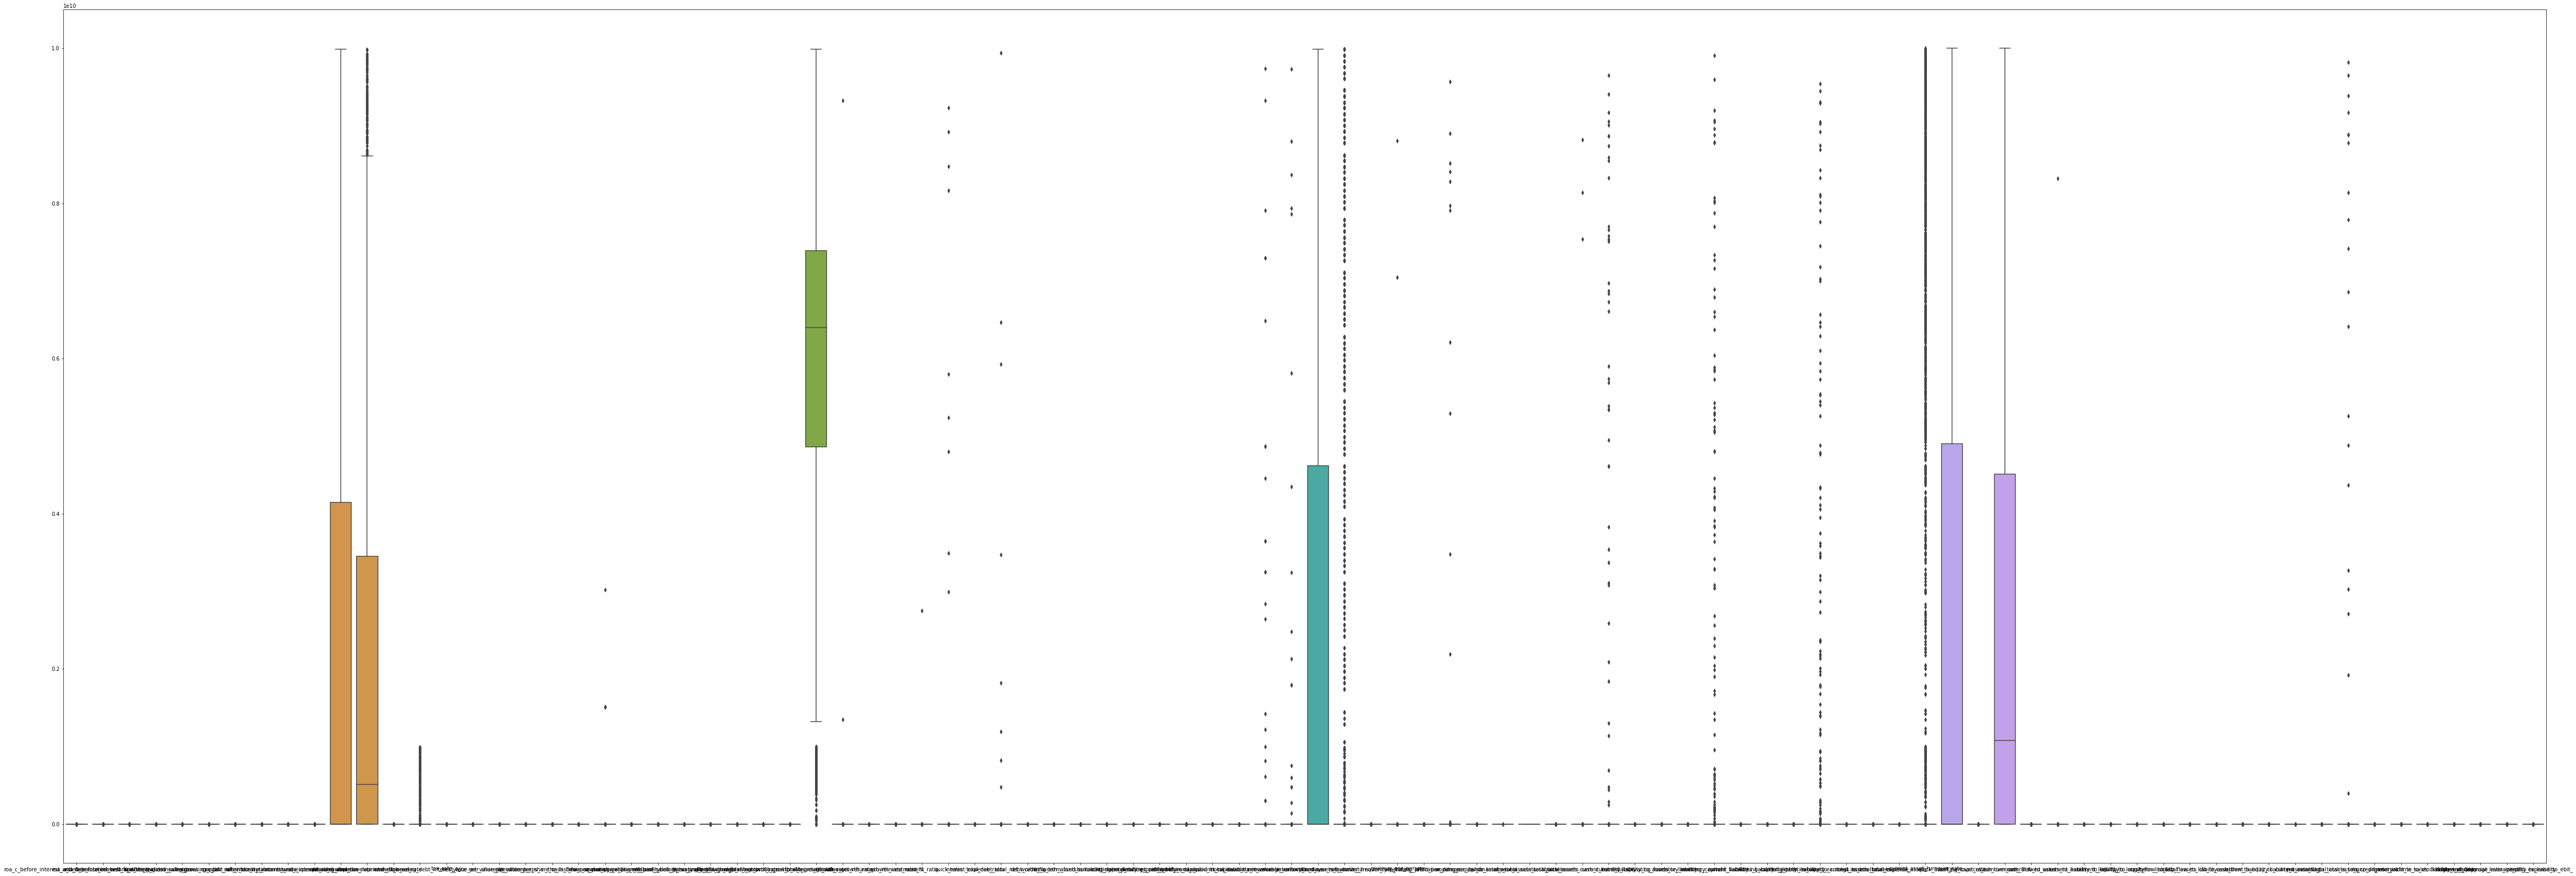

In [16]:
plt.figure(figsize=(85,30))
# Create a box plot
sns.boxplot(data=df, orient='v')

# Show the plot
plt.show()

We can identify many outliers in the dataset. But, as we are here to predict companies bankruptcy I don't think its fair to remove outliers. In this case these are termed as extream values not outliers.

In [17]:
# Find the skewness of all numerical variables
skewness = df.skew()

# Initialize empty lists to store the right skewed and left skewed variables
right_skewed = []
left_skewed = []

# Iterate over the skewness of each variable
for variable, skewness_value in skewness.iteritems():
    # Check if the variable is right skewed
    if skewness_value > 0:
        right_skewed.append(variable)
    # Check if the variable is left skewed
    elif skewness_value < 0:
        left_skewed.append(variable)

# Print the list of right skewed variables
print("Right Skewed variables: ", right_skewed)

# Print the list of left skewed variables
print("Left Skewed variables: ", left_skewed)

Right Skewed variables:  ['non_industry_income_and_expenditure_revenue', 'operating_expense_rate', 'research_and_development_expense_rate', 'cash_flow_rate', 'interest_bearing_debt_interest_rate', 'tax_rate_a_', 'net_value_per_share_b_', 'net_value_per_share_a_', 'net_value_per_share_c_', 'persistent_eps_in_the_last_four_seasons', 'cash_flow_per_share', 'revenue_per_share_yuan_¥_', 'operating_profit_per_share_yuan_¥_', 'per_share_net_profit_before_tax_yuan_¥_', 'realized_sales_gross_profit_growth_rate', 'continuous_net_profit_growth_rate', 'net_value_growth_rate', 'total_asset_return_growth_rate_ratio', 'cash_reinvestment_%', 'current_ratio', 'quick_ratio', 'total_debt_total_net_worth', 'debt_ratio_%', 'long_term_fund_suitability_ratio_a_', 'borrowing_dependency', 'contingent_liabilities_net_worth', 'operating_profit_paid_in_capital', 'net_profit_before_tax_paid_in_capital', 'inventory_and_accounts_receivable_net_value', 'total_asset_turnover', 'accounts_receivable_turnover', 'average_

Above are the right skewed and left skewed variables. Let's transform the data or scale(so that all the variables have similar range) it to reduce the skewness and make it near normal during model building only if this improved the performance.

# 5.Exploratory data analysis (EDA)

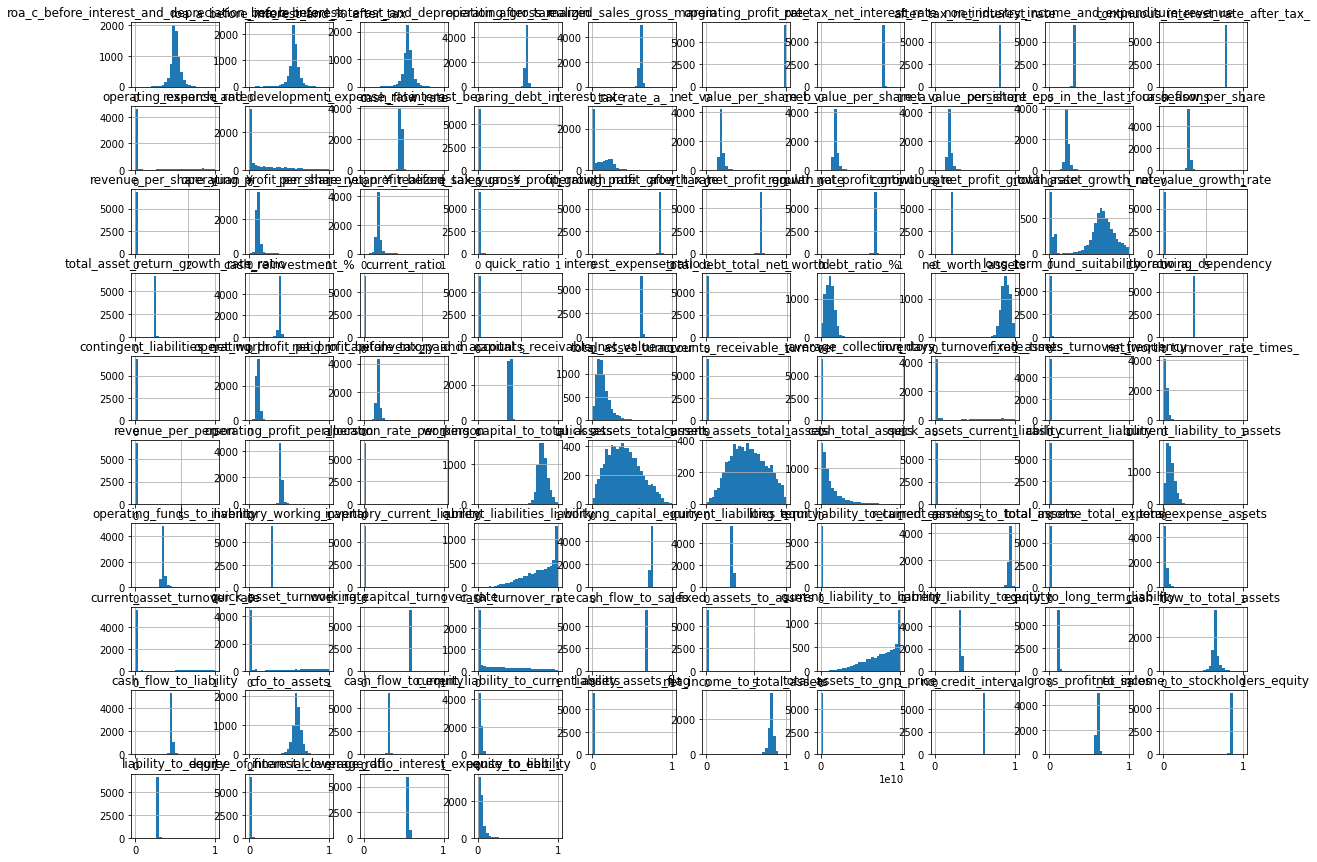

In [18]:
# Histograms
df.hist(bins=30, figsize=(20,15))
plt.show()

In [19]:
# Descriptive statistics
df.describe()

,roa_c_before_interest_and_depreciation_before_interest,roa_a_before_interest_and_%_after_tax,roa_b_before_interest_and_depreciation_after_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_and_expenditure_revenue,continuous_interest_rate_after_tax_,...,liability_assets_flag,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholders_equity,liability_to_equity,degree_of_financial_leverage_dfl_,interest_coverage_ratio_interest_expense_to_ebit_,equity_to_liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.047578
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,0.034234,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,0.000000,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.024477
50%,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635,...,0.000000,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.033798
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735,...,0.000000,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
data['bankrupt_'].value_counts()

0    6599
1     220
Name: bankrupt_, dtype: int64

- Imbalanced data
- Should deal with this using SMOTE.

Its important to findout the Multicollinearity in the data(using Variance Inflation Factor). Let's remove those variables first which are highly correlated with eachother.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# Initialize an empty list to store the VIFs
vifs = []

# Iterate over each column in the matrix
for i, column in enumerate(df.columns):
    # Fit a linear regression model without the current column
    x = df
    y = data['bankrupt_']
    model = sm.OLS(y, x).fit()
    # Calculate the VIF for the current column
    vif = variance_inflation_factor(x.values, i)
    # Append the VIF to the list
    vifs.append((column, vif))

# Print the VIFs
for column, vif in vifs:
    print(f"{column}: {vif:.2f}")

roa_c_before_interest_and_depreciation_before_interest: 69.15
roa_a_before_interest_and_%_after_tax: 43.86
roa_b_before_interest_and_depreciation_after_tax: 102.92
operating_gross_margin: 61429405.58
realized_sales_gross_margin: 1076.34
operating_profit_rate: 79892376.74
pre_tax_net_interest_rate: 132257881.73
after_tax_net_interest_rate: 1823.05
non_industry_income_and_expenditure_revenue: 8455100.90
continuous_interest_rate_after_tax_: 338.14
operating_expense_rate: 1.26
research_and_development_expense_rate: 1.09
cash_flow_rate: 7.60
interest_bearing_debt_interest_rate: 1.04
tax_rate_a_: 1.33
net_value_per_share_b_: 782.25
net_value_per_share_a_: 3912.26
net_value_per_share_c_: 3126.16
persistent_eps_in_the_last_four_seasons: 32.08
cash_flow_per_share: 4.24
revenue_per_share_yuan_¥_: 4.38
operating_profit_per_share_yuan_¥_: 638.11
per_share_net_profit_before_tax_yuan_¥_: 21.72
realized_sales_gross_profit_growth_rate: 1.04
operating_profit_growth_rate: 1.93
after_tax_net_profit_growt

In [30]:
# Set a threshold for the VIF
threshold = 5

# Initialize an empty list to store the variables to keep
variables_to_keep = []

# Iterate over the VIFs
for column, vif in vifs:
    # Check if the VIF is less than the threshold
    if vif < threshold:
        # Add the variable to the list of variables to keep
        variables_to_keep.append(column)

# Create a new DataFrame with only the variables to keep
df_reduced = df[variables_to_keep]

In [31]:
df_reduced.shape

(6819, 48)

In [32]:
df_reduced.head()

,operating_expense_rate,research_and_development_expense_rate,interest_bearing_debt_interest_rate,tax_rate_a_,cash_flow_per_share,revenue_per_share_yuan_¥_,realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,...,fixed_assets_to_assets,cash_flow_to_total_assets,cash_flow_to_liability,cash_flow_to_equity,current_liability_to_current_assets,liability_assets_flag,total_assets_to_gnp_price,degree_of_financial_leverage_dfl_,interest_coverage_ratio_interest_expense_to_ebit_,equity_to_liability
0,1.256970e-04,0.0,0.000725,0.0,0.311664,0.017560,0.022102,0.848195,0.217535,4.980000e+09,...,0.424206,0.637555,0.458609,0.312905,0.118250,0,0.009219,0.026601,0.564050,0.016469
1,2.897850e-04,0.0,0.000647,0.0,0.318137,0.021144,0.022080,0.848088,0.217620,6.110000e+09,...,0.468828,0.641100,0.459001,0.314163,0.047775,0,0.008323,0.264577,0.570175,0.020794
2,2.361300e-04,25500000.0,0.000790,0.0,0.307102,0.005944,0.022760,0.848094,0.217601,7.280000e+09,...,0.276179,0.642765,0.459254,0.314515,0.025346,0,0.040003,0.026555,0.563706,0.016474
3,1.078890e-04,0.0,0.000449,0.0,0.321674,0.014368,0.022046,0.848005,0.217568,4.880000e+09,...,0.559144,0.579039,0.448518,0.302382,0.067250,0,0.003252,0.026697,0.564663,0.023982
4,7.890000e+09,0.0,0.000686,0.0,0.319162,0.029690,0.022096,0.848258,0.217626,5.510000e+09,...,0.309555,0.622374,0.454411,0.311567,0.047725,0,0.003878,0.024752,0.575617,0.035490


In [37]:
df_reduced.describe()

,operating_expense_rate,research_and_development_expense_rate,interest_bearing_debt_interest_rate,tax_rate_a_,cash_flow_per_share,revenue_per_share_yuan_¥_,realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,...,fixed_assets_to_assets,cash_flow_to_total_assets,cash_flow_to_liability,cash_flow_to_equity,current_liability_to_current_assets,liability_assets_flag,total_assets_to_gnp_price,degree_of_financial_leverage_dfl_,interest_coverage_ratio_interest_expense_to_ebit_,equity_to_liability
count,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,...,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000
mean,1.995347e+09,1.950427e+09,1.644801e+07,0.115001,0.323482,1.328641e+06,0.022408,0.847980,0.217639,5.508097e+09,...,1.220121e+06,0.649731,0.461849,0.315582,0.031506,0.001173,1.862942e+07,0.027541,0.565358,0.047578
std,3.237684e+09,2.598292e+09,1.082750e+08,0.138667,0.017611,5.170709e+07,0.012079,0.010752,0.010063,2.897718e+09,...,1.007542e+08,0.047372,0.029943,0.012961,0.030845,0.034234,3.764501e+08,0.015668,0.013214,0.050014
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.566870e-04,1.281880e-04,2.030200e-04,0.000000,0.317748,1.563138e-02,0.022065,0.847984,0.217580,4.860000e+09,...,8.536037e-02,0.633265,0.457116,0.312995,0.018034,0.000000,9.036205e-04,0.026791,0.565158,0.024477
50%,2.777590e-04,5.090000e+08,3.210320e-04,0.073489,0.322487,2.737571e-02,0.022102,0.848044,0.217598,6.400000e+09,...,1.968810e-01,0.645366,0.459750,0.314953,0.027597,0.000000,2.085213e-03,0.026808,0.565252,0.033798
75%,4.145000e+09,3.450000e+09,5.325530e-04,0.205841,0.328623,4.635722e-02,0.022153,0.848123,0.217622,7.390000e+09,...,3.722000e-01,0.663062,0.464236,0.317707,0.038375,0.000000,5.269777e-03,0.026913,0.565725,0.052838
max,9.990000e+09,9.980000e+09,9.900000e+08,1.000000,1.000000,3.020000e+09,1.000000,1.000000,1.000000,9.990000e+09,...,8.320000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,9.820000e+09,1.000000,1.000000,1.000000


Its better to scale the data as it helps to standardize the range of values for each feature.
Let me use Robust Scaler: This method is similar to the standard scaler, but it uses the median and interquartile range (IQR) instead of the mean and standard deviation to scale the data. This makes it more robust to outliers.

In [44]:
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
scaler = RobustScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df_reduced), columns=df_reduced.columns, index=df_reduced.index)

In [45]:
df_scaled.describe()

,operating_expense_rate,research_and_development_expense_rate,interest_bearing_debt_interest_rate,tax_rate_a_,cash_flow_per_share,revenue_per_share_yuan_¥_,realized_sales_gross_profit_growth_rate,operating_profit_growth_rate,continuous_net_profit_growth_rate,total_asset_growth_rate,...,fixed_assets_to_assets,cash_flow_to_total_assets,cash_flow_to_liability,cash_flow_to_equity,current_liability_to_current_assets,liability_assets_flag,total_assets_to_gnp_price,degree_of_financial_leverage_dfl_,interest_coverage_ratio_interest_expense_to_ebit_,equity_to_liability
count,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,...,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000
mean,4.813866e-01,0.417805,4.991310e+10,0.201668,0.091472,4.324181e+07,3.447269,-0.458988,0.975625,-0.352531,...,4.253667e+06,0.146464,0.294846,0.133610,0.192185,0.001173,4.266777e+09,6.006789,0.187184,0.485900
std,7.811059e-01,0.753128,3.285711e+11,0.673664,1.619288,1.682854e+09,136.311031,77.673071,239.654274,1.145343,...,3.512561e+08,1.589854,4.205804,2.750328,1.516384,0.034234,8.622001e+10,128.396811,23.333789,1.763460
min,-6.701062e-14,-0.147536,-9.742029e-01,-0.357020,-29.652033,-8.909673e-01,-249.418815,-6126.043624,-5182.201431,-2.529644,...,-6.863803e-01,-21.659111,-64.577358,-66.833624,-1.356728,0.000000,-4.775855e-01,-219.689218,-998.125471,-1.191691
25%,-2.920917e-14,-0.147536,-3.581189e-01,-0.357020,-0.435772,-3.822299e-01,-0.427013,-0.429278,-0.441420,-0.608696,...,-3.887911e-01,-0.406126,-0.369929,-0.415503,-0.470159,0.000000,-2.706253e-01,-0.139059,-0.165161,-0.328654
50%,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,1.000000e+00,0.852464,6.418811e-01,0.642980,0.564228,6.177701e-01,0.572987,0.570722,0.558580,0.391304,...,6.112089e-01,0.593874,0.630071,0.584497,0.529841,0.000000,7.293747e-01,0.860941,0.834839,0.671346
max,2.410133e+00,2.745217,3.004251e+12,4.501106,62.295936,9.828862e+10,11035.288714,1097.693576,18633.276248,1.418972,...,2.900576e+10,11.901838,75.884499,145.368440,47.805184,1.000000,2.249118e+12,7975.184889,767.680924,34.067842


# 6. Feature Selection
- Let's create 3 instances to select important features for further analysis and model building.
1.   High positively and negetively correlated values with target variable.
2.   Feature selection using Random Forest Classification algorithem
3.   PCA to reduce the dimentions



Using Random Forest

In [57]:
X = df_scaled
y = data['bankrupt_']

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for the number of features
param_grid = {'max_features': np.arange(1, 49)}

# Initialize the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=make_scorer(f1_score), n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best number of features
best_n_features = grid_search.best_params_['max_features']

# Print the best number of features
print(f'The best number of features is {best_n_features}')

The best number of features is 35


In [59]:
# Get the feature importances
importances = grid_search.best_estimator_.feature_importances_

# Get the indices of the top 'n' features
top_n = importances.argsort()[-best_n_features:][::-1]

# Print the top 'n' features
print(f'The top {best_n_features} features are:')
for i in top_n:
    print(f'{X.columns[i]}')

The top 35 features are:
net_value_growth_rate
total_debt_total_net_worth
total_income_total_expense
degree_of_financial_leverage_dfl_
interest_bearing_debt_interest_rate
cash_total_assets
equity_to_liability
total_asset_return_growth_rate_ratio
interest_expense_ratio
cash_current_liability
fixed_assets_turnover_frequency
inventory_working_capital
operating_profit_per_person
accounts_receivable_turnover
interest_coverage_ratio_interest_expense_to_ebit_
quick_ratio
retained_earnings_to_total_assets
continuous_net_profit_growth_rate
average_collection_days
allocation_rate_per_person
total_expense_assets
total_asset_growth_rate
revenue_per_person
current_asset_turnover_rate
total_assets_to_gnp_price
realized_sales_gross_profit_growth_rate
cash_flow_to_liability
quick_assets_current_liability
operating_profit_growth_rate
fixed_assets_to_assets
cash_flow_per_share
revenue_per_share_yuan_¥_
research_and_development_expense_rate
inventory_current_liability
cash_flow_to_total_assets


In [61]:
# Create a new dataframe with the top 'n' features
important_features = X.columns[top_n]
df_imp = X[important_features]

In [62]:
df_imp.head()

,net_value_growth_rate,total_debt_total_net_worth,total_income_total_expense,degree_of_financial_leverage_dfl_,interest_bearing_debt_interest_rate,cash_total_assets,equity_to_liability,total_asset_return_growth_rate_ratio,interest_expense_ratio,cash_current_liability,...,realized_sales_gross_profit_growth_rate,cash_flow_to_liability,quick_assets_current_liability,operating_profit_growth_rate,fixed_assets_to_assets,cash_flow_per_share,revenue_per_share_yuan_¥_,research_and_development_expense_rate,inventory_current_liability,cash_flow_to_total_assets
0,-2.311561,2.508623,-1.227519,-1.700395,1.226102,-0.555109,-0.611011,-1.508641,-1.455941,-4.390973e-01,...,-0.001072,-0.160266,-0.766700,1.094114,0.792515,-0.995122,-0.319468,-0.147536,-0.684069,-0.262147
1,-0.323943,1.110093,-0.431457,1948.484514,0.989379,-0.470005,-0.458493,0.740740,8.721622,-3.249439e-01,...,-0.250554,-0.105218,-0.489275,0.320373,0.948081,-0.400000,-0.202806,-0.147536,-0.161287,-0.143187
2,-1.122241,2.505712,-1.077442,-2.076630,1.423369,-0.579445,-0.610821,0.213581,-2.079439,4.929580e+11,...,7.422223,-0.069683,-0.208324,0.364647,0.276455,-1.414634,-0.697514,-0.140145,0.924575,-0.087323
3,-1.361978,0.642509,-1.969960,-0.913663,0.388468,-0.439401,-0.346085,-1.077777,-0.915888,-3.594015e-01,...,-0.635397,-1.577699,-0.641625,-0.274914,1.262946,-0.074797,-0.423333,-0.147536,-0.370407,-2.226002
4,-0.394020,-0.063305,-0.438005,-16.850939,1.107740,-0.476174,0.059677,1.856789,10.441916,-3.898820e-01,...,-0.072933,-0.749955,-0.471283,1.550705,0.392811,-0.305691,0.075314,-0.147536,-0.204013,-0.771646


In [64]:
df_imp.shape

(6819, 35)

In [65]:
X = df_imp
y = data['bankrupt_']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((5455, 35), (1364, 35))

In [84]:
from imblearn.combine import SMOTETomek

from collections import Counter

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

pnt = [0.6,0.65,0.7]
for i in pnt:
    print('SMOTE = ', i)
    os=SMOTETomek(i)
    X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
    print("The number of classes before fit {}".format(Counter(y_train)))
    print("The number of classes after fit {}".format(Counter(y_train_ns)))

    classifier=RandomForestClassifier()
    classifier.fit(X_train_ns,y_train_ns)
    y_pred=classifier.predict(X_test)
    print('accuracy_score: ', accuracy_score(y_test,y_pred))
    print('\n')

SMOTE =  0.6
The number of classes before fit Counter({0: 5281, 1: 174})
The number of classes after fit Counter({0: 5174, 1: 3061})
accuracy_score:  0.9589442815249267


SMOTE =  0.65
The number of classes before fit Counter({0: 5281, 1: 174})
The number of classes after fit Counter({0: 5171, 1: 3322})
accuracy_score:  0.9596774193548387


SMOTE =  0.7
The number of classes before fit Counter({0: 5281, 1: 174})
The number of classes after fit Counter({0: 5154, 1: 3569})
accuracy_score:  0.9604105571847508


